# Problem statement
## DATASET
1. dateCrawled : when this ad was first crawled, all field-values are taken from this date
2. name : "name" of the car
3. seller : private or dealer
4. offerType : the selling type of the car
5. price : the price on the ad to sell the car
6. abtest : unknown
7. vehicleType : type of the car. Limousine, kleinwagen, kombi, bus etc.
8. yearOfRegistration : at which year the car was first registered
9. gearbox : manuel or otomatic
10. powerPS : power of the car in PS
11. model : model of the car
12. kilometer : how many kilometers the car has driven
13. monthOfRegistration : at which month the car was first registered
14. fuelType : benzin, diesel, lpg etc
15. brand : brand of the car. Mercedes, Porsche, audi etc…
16. notRepairedDamage : if the car has a damage which is not repaired yet. Yes or no
17. dateCreated : the date for which the ad at ebay was created
18. nrOfPictures : number of pictures in the ad
19. postalCode : code that shows the location of the car
20. lastSeenOnline : when the crawler saw this ad last online

In [1]:
# Import required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as plt

# Load the dataset
df = pd.read_csv("cars_sample.csv", encoding='unicode_escape')

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [2]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [3]:
columns_to_check = [
    'seller', 'offerType', 'abtest', 'vehicleType', 'yearOfRegistration',
    'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
    'fuelType', 'notRepairedDamage', 'dateCreated', 'postalCode',
    'lastSeen', 'price'
]

In [4]:
for column in columns_to_check:
    print(f"{column}:")
    print(df[column].value_counts())
    print()

seller:
private       49999
commercial        2
Name: seller, dtype: int64

offerType:
offer      49998
request        3
Name: offerType, dtype: int64

abtest:
test       25869
control    24132
Name: abtest, dtype: int64

vehicleType:
limousine        13041
small car        10744
station wagon     8990
bus               3995
cabrio            3056
coupe             2536
suv               2011
others             440
Name: vehicleType, dtype: int64

yearOfRegistration:
2000    3315
2005    3131
1999    3055
2001    2804
2003    2756
2006    2682
2004    2630
2002    2571
1998    2443
2007    2374
2008    2218
2009    2043
1997    1968
2010    1661
2011    1581
1996    1412
2017    1382
2016    1352
1995    1272
2012    1243
2013     828
2014     628
1994     626
2018     530
1993     457
1991     414
2015     407
1990     398
1992     394
1989     198
1988     132
1985     110
1987      82
1980      77
1983      59
1970      55
1986      53
1979      50
1984      49
1978      49
1972    

lastSeen:
6/4/2016 5:46       107
6/4/2016 5:45       105
6/4/2016 1:16       104
7/4/2016 1:17       102
7/4/2016 5:16       101
6/4/2016 15:45      101
7/4/2016 4:46       101
7/4/2016 6:16       101
7/4/2016 6:45        99
6/4/2016 7:45        99
6/4/2016 9:17        98
6/4/2016 3:16        95
6/4/2016 2:45        95
6/4/2016 9:45        94
6/4/2016 8:17        94
6/4/2016 4:45        94
6/4/2016 16:17       94
7/4/2016 7:16        94
6/4/2016 3:45        94
6/4/2016 13:17       94
7/4/2016 12:17       93
6/4/2016 13:45       93
7/4/2016 4:17        93
6/4/2016 11:16       93
7/4/2016 7:45        93
6/4/2016 12:16       92
6/4/2016 6:45        92
7/4/2016 14:57       92
6/4/2016 7:46        91
7/4/2016 11:45       91
6/4/2016 8:16        90
7/4/2016 11:17       90
6/4/2016 8:45        89
7/4/2016 10:16       89
7/4/2016 9:45        89
7/4/2016 3:17        89
6/4/2016 14:17       88
7/4/2016 10:45       88
7/4/2016 2:17        88
6/4/2016 0:46        87
7/4/2016 5:46        87
6/4/20

0           1451
500          742
1500         705
1000         647
2500         594
1200         584
600          544
3500         499
2000         497
800          469
999          449
850          448
750          427
4500         425
650          412
900          395
700          391
1100         391
1300         390
2200         373
1800         366
300          361
1600         361
950          360
3000         352
550          345
5500         344
1999         329
400          327
350          327
6500         326
1250         320
1400         299
250          298
2800         288
3200         280
1700         279
200          279
450          277
1350         275
2600         267
4000         266
1900         260
2300         258
5000         255
1450         245
2900         245
2999         238
1650         237
1950         235
1150         230
8500         227
7500         227
3999         226
2400         220
3800         218
1750         217
9500         216
3900         2

## Drop unnecessary columns 

- we can drop seller as we are having only private seller

- we can drop offer type as we are having 99.99 percent data for a single class/unique values

- we can drop name as of now because it is very diifcult to seperate each model.

- model - we can delete as it is a duplicate of gearbox
- Name: We can delete as of now as many names
- abtest: we can keep
- Vehicle type : we can keep (8)
- yearOfRegistration: we can keep (96 years)
- GrarBox - 2
- PowerPS - 96
- model - we can delete as it a duplicate
- Kilometer - 13
- monthOfRegistration - 12
- fuel -7
- brand - 40
- notRepairedDamage -2
- postalCode - Need to think - Many (7050)
- Price - Continuous - Keep


In [5]:
# Drop unnecessary columns
df = df.drop(['seller', 'offerType', 'model', 'name'], axis=1)

## calculate null values and impute with repeated values

In [6]:
uniqueValues = df.nunique()
missing_value = (df.isnull().sum()/len(df))*100
# missing_value_df = pd.DataFrame({'percent_missing': missing_value.sort_values(ascending=False),'uniqueValues':uniqueValues})
missing_value_df = pd.DataFrame({'percent_missing': missing_value.sort_values(ascending=False)})
missing_value_df

percent_missing
notRepairedDamage          19.431611
vehicleType                10.375792
fuelType                    9.005820
gearbox                     5.647887
dateCrawled                 0.000000
price                       0.000000
abtest                      0.000000
yearOfRegistration          0.000000
powerPS                     0.000000
kilometer                   0.000000
monthOfRegistration         0.000000
brand                       0.000000
dateCreated                 0.000000
postalCode                  0.000000
lastSeen                    0.000000

In [7]:
df.notRepairedDamage.value_counts()

no     35337
yes     4948
Name: notRepairedDamage, dtype: int64

- Feature
    - Null Values:19.5%
    - Yes: 9.8%
    - No: 70 %
- If we impute the null values with mode then 90% of data will be class "No". In this situation what is the best way to impute.

In [8]:
# Calculate and impute null values
df['notRepairedDamage'] = df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0])
df['vehicleType'] = df['vehicleType'].fillna(df['vehicleType'].mode()[0])
df['fuelType'] = df['fuelType'].fillna(df['fuelType'].mode()[0])
df['gearbox'] = df['gearbox'].fillna(df['gearbox'].mode()[0])

In [9]:
missing_value = (df.isnull().sum()/len(df))*100
missing_value_df = pd.DataFrame({'percent_missing': missing_value.sort_values(ascending=False)})
missing_value_df

percent_missing
dateCrawled                      0.0
price                            0.0
abtest                           0.0
vehicleType                      0.0
yearOfRegistration               0.0
gearbox                          0.0
powerPS                          0.0
kilometer                        0.0
monthOfRegistration              0.0
fuelType                         0.0
brand                            0.0
notRepairedDamage                0.0
dateCreated                      0.0
postalCode                       0.0
lastSeen                         0.0

# Separate date and time in dateCrawled, dateCreated & lastSeen

In [10]:
# Separate date and time in dateCrawled, dateCreated & lastSeen
df['Date_dateCrawled'] = pd.to_datetime(df['dateCrawled']).dt.date
df['Time_dateCrawled'] = pd.to_datetime(df['dateCrawled']).dt.time
df = df.drop(['dateCrawled'], axis=1)

df['Date_dateCreated'] = pd.to_datetime(df['dateCreated']).dt.date
df['Time_dateCreated'] = pd.to_datetime(df['dateCreated']).dt.time
df = df.drop(['dateCreated'], axis=1)

df['Date_lastSeen'] = pd.to_datetime(df['lastSeen']).dt.date
df['Time_lastSeen'] = pd.to_datetime(df['lastSeen']).dt.time
df = df.drop(['lastSeen'], axis=1)

df = df.drop(['Date_dateCrawled', 'Time_dateCrawled', 'Date_dateCreated', 'Date_lastSeen', 'Time_lastSeen'], axis=1)

In [11]:
df.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'postalCode', 'Time_dateCreated'],
      dtype='object')

# Univariate Analysis

## Categorical columns

Univariate Analysis: In univariate analysis, you only have one variable, so the most common plots used are:

- Histograms: To visualize the distribution of a continuous variable
- Bar Charts: To visualize the distribution of a categorical variable
- Box Plots: To visualize the distribution of a continuous variable and to identify outliers
- Density Plots: To visualize the distribution of a continuous variable with a smoother curve

What are the five concepts of univariate analysis?

A. The five concepts of univariate analysis are:
1. Central Tendency: Measures like mean, median, and mode to understand the center of the data distribution.
2. Dispersion: Measures such as range, variance, and standard deviation to assess the spread or variability of the data.
3. Distribution: Understanding the shape of the data through histograms, box plots, and probability plots.
4. Outliers: Identification and treatment of extreme values that deviate significantly from the rest of the data.
5. Summary Statistics: Providing a concise overview of the data through quantiles, percentiles, and other statistical measures.

In [12]:
# Univariate analysis - Categorical columns
import matplotlib.pyplot as plt
import seaborn as sns

    
def univariate_cat(column):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Pie Plot
    df[column].value_counts().plot.pie(autopct="%1.0f%%", ax=axes[0])
    axes[0].set_title("Pie Plot - " + column)

    # Bar Plot
    df[column].value_counts(normalize=True).plot.barh(ax=axes[1])
    axes[1].set_title("Bar Plot - " + column)

    # Histogram
    sns.countplot(x=df[column], ax=axes[2])
    axes[2].set_title("Histogram - " + column)
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Perform univariate analysis for selected columns
# selected_columns = ['abtest', 'vehicleType', 'gearbox', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode', 'price']
# for column in selected_columns:
#     univariate_cat(column)



In [13]:
df.monthOfRegistration.value_counts()

0     5043
3     4755
6     4449
4     4153
5     4109
7     3897
10    3666
9     3453
11    3436
12    3403
1     3286
8     3240
2     3111
Name: monthOfRegistration, dtype: int64

> There is some data with Month = 0. Which is a wrong entry. We have to delete this data.

In [14]:
df = df[~(df['monthOfRegistration'] == 0)]

In [15]:
df.monthOfRegistration.value_counts()

3     4755
6     4449
4     4153
5     4109
7     3897
10    3666
9     3453
11    3436
12    3403
1     3286
8     3240
2     3111
Name: monthOfRegistration, dtype: int64

# Continuous colums

Univariate Analysis: In univariate analysis, you only have one variable, so the most common plots used are:

- Histograms: To visualize the distribution of a continuous variable
- Bar Charts: To visualize the distribution of a categorical variable
- Box Plots: To visualize the distribution of a continuous variable and to identify outliers
- Density Plots: To visualize the distribution of a continuous variable with a smoother curve

## Univariate analysis - Continuous columns

In [16]:

import seaborn as sns

def univariate_con(column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

    # Box Plot
    ax1.boxplot(df[column])
    ax1.set_title("Box Plot - " + column)

    # Histogram
    sns.histplot(df[column], ax=ax2, kde=True)
    ax2.set_title("Histogram - " + column)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()
    
# Perform univariate analysis for selected continuous columns
# selected_continuous_columns = ['yearOfRegistration', 'powerPS', 'kilometer', 'price']
# for column in selected_continuous_columns:
#     univariate_con(column)

### yearOfRegistration

In [17]:
# univariate_con('yearOfRegistration')

df['yearOfRegistration'].describe()

# fig = plt.figure(figsize =(10, 7))
# plt.boxplot(df.yearOfRegistration)
# plt.show()

count    44958.000000
mean      2003.832288
std         42.013998
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: yearOfRegistration, dtype: float64

> **We can clearly see there are some outliers in years data. We have drop the data which is less than 1900 and greater than 2020. As there are only 5 rows which are having incorrect data so we can directly delete those rows.**

In [18]:
df.shape

df = df[~((df['yearOfRegistration'] >= 2020) | (df['yearOfRegistration'] <= 1900))]

df.shape

df['yearOfRegistration'].describe()

count    44953.000000
mean      2003.556893
std          7.313817
min       1910.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2019.000000
Name: yearOfRegistration, dtype: float64

### powerPS

In [19]:
# univariate_con('powerPS')

df.powerPS.describe()

Test = df[(df['powerPS'] <= 10) | (df['powerPS'] >= 2400)]
Test


price   abtest    vehicleType  yearOfRegistration    gearbox  powerPS  \
6         400     test  station wagon                1996     manual        0   
49       1000  control      small car                2001     manual        0   
74          0  control      limousine                1995  automatic        0   
84       1150     test      small car                1997     manual        0   
89        380  control  station wagon                1999     manual        0   
103      3100  control      limousine                2007     manual        0   
113      2500  control      limousine                2008     manual        0   
124      1399  control  station wagon                1997     manual        0   
131      3000  control            suv                2006     manual        0   
133       950     test  station wagon                2003     manual        0   
142      1350     test      limousine                1995  automatic        0   
156      1500     test         others                2003  automatic        0   
184      4500  control         cabrio                2006     manual        0   
190       850  control      small car                1998     manual        0   
194     26999     test      limousine                2010  automatic        0   
205      3999     test      small car                1990     manual        0   
210      3890     test      limousine                2017     manual        0   
216      1650  control  station wagon                2002     manual        0   
219      1250     test      limousine                1998     manual        0   
235      4200     test            suv                2007     manual        0   
240      6100  control  station wagon                2009     manual        0   
248       850     test          coupe                2000     manual        0   
274      4550  control            bus                2009     manual        0   
277      1650     test      small car                2004     manual        0   
282         0     test      limousine                2013     manual        0   
307      1200  control  station wagon                2002     manual        0   
354       450     test      limousine                1997     manual        0   
363      1950     test  station wagon                2002  automatic        0   
379       600  control  station wagon                1998     manual        0   
390      1700  control      limousine                2000     manual        0   
392       650     test      limousine                2004     manual        0   
409       650     test      small car                1996     manual        0   
410       800  control      limousine                2016     manual        0   
423      1550     test         cabrio                1996     manual        0   
431         0     test      limousine                2017     manual        0   
432      1599  control      limousine                2018     manual        0   
436       300     test      limousine                1998     manual        0   
449      3600  control         cabrio                2000     manual        0   
455      2500     test      limousine                2002     manual        0   
475      3900  control            suv                2004     manual        0   
482      1499     test      small car                2002     manual        0   
491      1999  control      limousine                2017  automatic        0   
507      2900     test      small car                2005     manual        0   
520       150     test      limousine                1998     manual        0   
551       550  control      small car                2001     manual        0   
563      6600     test      limousine                2018     manual        0   
567      2000  control            bus                2003     manual    12512   
588       249  control      limousine                2000     manual        0   
599      2200  control      limousine  

> **The PS range of recent vehicles is from 10PS to 2400PS. The data above or below these values are probably incorrect entry.
We can impute these values with mean as there are 3462 rows.**

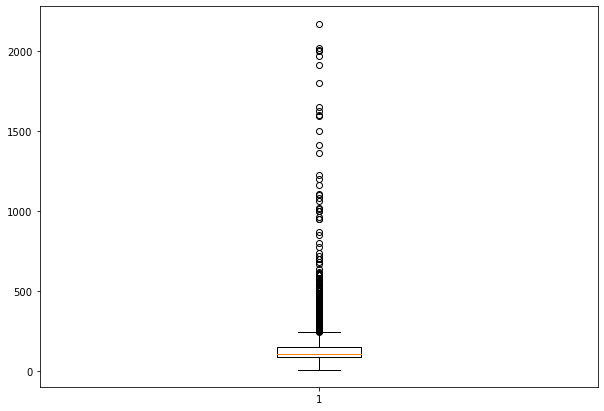

In [20]:

df['powerPS'] = np.where((df['powerPS'] > 2400) | (df['powerPS'] < 10), 110, df['powerPS'])

df['powerPS'].describe()

fig = plt.figure(figsize =(10, 7))
plt.boxplot(df.powerPS)
plt.show()

### kilometer

In [21]:
# univariate_con('kilometer')

df.kilometer.describe()

count     44953.000000
mean     125514.092497
std       39545.412327
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

### price

In [22]:
# univariate_con('price')

df.price.describe()

df.shape

Test = df[~(df['price'] >= 100000)]

Test.shape

Test = df[~(df['price'] == 0)]

Test.shape


(44128, 13)


> **There are few records with price on the ad to see the car is more than 1L, which are outliers and also some rows with car cost = 0 which means the car is free, which is not correct. We can drop those records as most of the data is lying under 1L.**


(44075, 13)

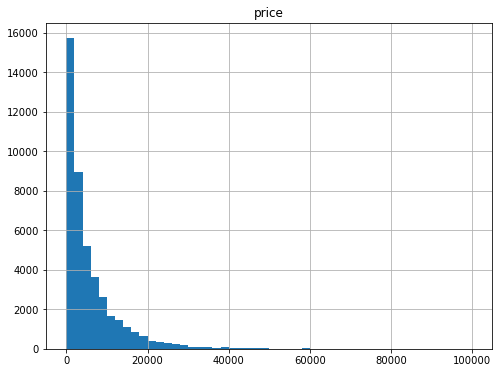

In [23]:

df = df[~((df['price'] >= 100000) | (df['price'] == 0))]

df.hist(column=['price'], bins=50, figsize=(8, 6))

# univariate_con('price')

df.shape

### IQR

In [24]:
# Import numpy library
import numpy as np
  
data = [32, 36, 46, 47, 56, 69, 75, 79, 79, 88, 89, 91, 92, 93, 96, 97, 
        101, 105, 112, 116]
  
# First quartile (Q1)
Q1 = np.percentile(df.price, 25, interpolation='midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df.price, 75, interpolation='midpoint')
  
# Interquartile range (IQR)
IQR = Q3 - Q1
  
print(IQR)

lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

print(lower_fence, upper_fence)

6500.0
-8350.0 17650.0


> **Upper fence as per IQR is 17775**

# Bi-Variate analysis

## Scatter Plots:

> **Use scatter plots to visualize the relationship between 'price' and continuous variables such as 'powerPS', 'kilometer', etc.**

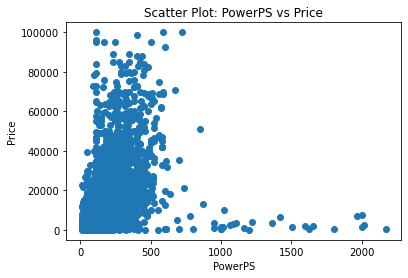

In [25]:
import matplotlib.pyplot as plt

plt.scatter(df['powerPS'], df['price'])
plt.xlabel('PowerPS')
plt.ylabel('Price')
plt.title('Scatter Plot: PowerPS vs Price')
plt.show()

## Box Plots:
> Box plots can be used to visualize the distribution of 'price' across different categories of a categorical variable.

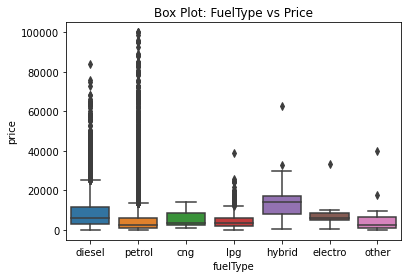

In [26]:
import seaborn as sns

sns.boxplot(x='fuelType', y='price', data=df)
plt.title('Box Plot: FuelType vs Price')
plt.show()

## Correlation Matrix:
> Compute the correlation matrix to see the correlation coefficients between 'price' and other numerical variables.

In [27]:
correlation_matrix = df.corr()
print(correlation_matrix['price'])

price                  1.000000
yearOfRegistration     0.333020
powerPS                0.506334
kilometer             -0.441808
monthOfRegistration    0.003262
postalCode             0.080952
Name: price, dtype: float64


## Pair Plots:
> Pair plots can provide a quick overview of relationships between numerical variables.

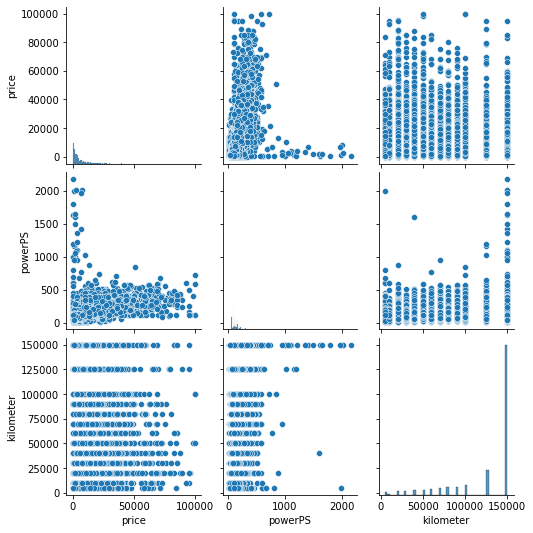

In [28]:
sns.pairplot(df[['price', 'powerPS', 'kilometer']])
plt.show()

## Categorical Plots:
> Use categorical plots to visualize the relationship between 'price' and categorical variables.

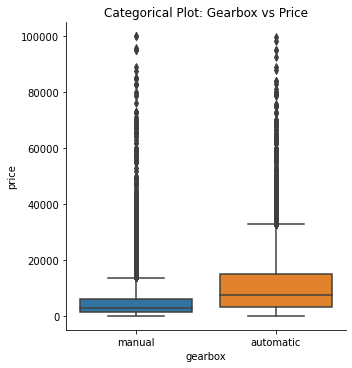

In [29]:
sns.catplot(x='gearbox', y='price', data=df, kind='box')
plt.title('Categorical Plot: Gearbox vs Price')
plt.show()

# Feature Engineering

In [30]:
for i in df.columns:
    print(f"---------------------------------{i}--------------------------------------------------------")
    print(df[i].unique())

---------------------------------price--------------------------------------------------------
[ 4450 13299  3200 ... 24301  4666 36399]
---------------------------------abtest--------------------------------------------------------
['test' 'control']
---------------------------------vehicleType--------------------------------------------------------
['limousine' 'suv' 'bus' 'small car' 'station wagon' 'coupe' 'others'
 'cabrio']
---------------------------------yearOfRegistration--------------------------------------------------------
[2003 2005 2006 2008 1995 1996 1997 2001 1999 1993 2002 1992 1991 2000
 2011 2004 2009 1979 1998 2010 2007 2017 2016 1994 2013 2018 2012 1972
 2014 2015 1990 1989 1988 1970 2019 1983 1964 1971 1975 1987 1977 1976
 1980 1974 1978 1962 1938 1967 1986 1985 1960 1959 1982 1981 1984 1950
 1945 1966 1965 1958 1973 1955 1963 1936 1968 1961 1940 1969 1954 1957
 1956 1929 1952 1943 1951 1941 1947 1953]
---------------------------------gearbox---------------------

In [31]:
results_dict = {}

for i in df.columns:
    #print(f"---------------------------------{i}--------------------------------------------------------")
    unique_values = df[i].unique()
    #print(unique_values)
    
    # Store the unique values as a list in the dictionary
    results_dict[i] = list(unique_values)

# Find the maximum length of unique values
max_length = max(len(values) for values in results_dict.values())

# Pad the lists with NaN to make them of equal length
for values in results_dict.values():
    while len(values) < max_length:
        values.append("-")

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results_dict)

# Display the resulting DataFrame
print("Resulting DataFrame:")
print(results_df)

Resulting DataFrame:
      price   abtest    vehicleType yearOfRegistration    gearbox powerPS  \
0      4450     test      limousine               2003     manual     150   
1     13299  control            suv               2005  automatic     163   
2      3200        -            bus               2006          -     101   
3      4500        -      small car               2008          -      86   
4     18750        -  station wagon               1995          -     185   
5       988        -          coupe               1996          -      90   
6       400        -         others               1997          -     110   
7      1399        -         cabrio               2001          -     136   
8      4680        -              -               1999          -     122   
9      8340        -              -               1993          -     140   
10     1870        -              -               2002          -      82   
11     2500        -              -               1992 

1. **abtest:**
   - This is a binary categorical variable with values 'test' and 'control'. You can encode it using binary encoding (0 and 1) or one-hot encoding.

2. **vehicleType:**
   - Apply one-hot encoding to convert the categorical variable "vehicleType" into binary columns for each category. There are categories like 'station wagon,' 'limousine,' 'small car,' 'suv,' 'bus,' 'coupe,' 'cabrio,' and 'others.'

3. **yearOfRegistration:**
   - You can calculate the age of the vehicle by subtracting the "yearOfRegistration" from the current year. This can be used as a feature.
   - Create bins for vehicle age or decade of registration to capture patterns.

4. **gearbox:**
   - Convert "gearbox" to a binary variable using one-hot encoding (0 for manual, 1 for automatic).

5. **powerPS:**
   - Check for outliers and consider winsorizing or capping extreme values.
   - Create bins for power ranges or apply logarithmic transformations to handle the wide range of values.

6. **kilometer:**
   - No specific feature engineering may be needed for "kilometer" unless there are outliers. Ensure the values are within a reasonable range.

7. **monthOfRegistration:**
   - Convert "monthOfRegistration" into a cyclical feature (e.g., using sine and cosine transformations) to capture potential seasonal patterns.

8. **fuelType:**
   - Apply one-hot encoding to convert the categorical variable "fuelType" into binary columns for each fuel type.

9. **brand:**
   - Depending on the number of unique brands, apply one-hot encoding or label encoding.
   - Consider grouping rare brands into an "other" category.

10. **notRepairedDamage:**
    - Convert "notRepairedDamage" into a binary variable using one-hot encoding (0 for 'no' and 1 for 'yes').

11. **postalCode:**
    - Depending on the cardinality, consider grouping postal codes into broader regions or using target encoding.

12. **price:**
    - Check for outliers in the "price" column and consider winsorizing or capping extreme values.
    - If the distribution is highly skewed, consider applying a logarithmic transformation to make it more symmetric.




### Creating dummies for ab test:

In [32]:
df.head()

df1 = df.copy()

df = pd.get_dummies(df, columns=['abtest','vehicleType', 'fuelType', 'gearbox', 'notRepairedDamage'], drop_first=True)

In [33]:
df.head()

price  yearOfRegistration  powerPS  kilometer  monthOfRegistration  \
0   4450                2003      150     150000                    3   
1  13299                2005      163     150000                    6   
2   3200                2003      101     150000                   11   
3   4500                2006       86      60000                   12   
4  18750                2008      185     150000                   11   

        brand  postalCode Time_dateCreated  abtest_test  vehicleType_cabrio  \
0         bmw       20257         00:00:00            1                   0   
1       volvo       88045         00:00:00            0                   0   
2  volkswagen       27449         00:00:00            1                   0   
3        seat       34537         00:00:00            0                   0   
4       volvo       55270         00:00:00            1                   0   

   vehicleType_coupe  vehicleType_limousine  vehicleType_others  \
0                  0                      1                   0   
1                  0                      0                   0   
2                  0                      0                   0   
3                  0                      0                   0   
4                  0                      0                   0   

   vehicleType_small car  vehicleType_station wagon  vehicleType_suv  \
0                      0                          0                0   
1                      0                          0                1   
2                      0                          0                0   
3                      1                          0                0   
4                      0                          0                1   

   fuelType_diesel  fuelType_electro  fuelType_hybrid  fuelType_lpg  \
0                1                 0                0             0   
1                1                 0                0             0   
2                1                 0                0             0   
3                0                 0                0             0   
4                1                 0                0             0   

   fuelType_other  fuelType_petrol  gearbox_manual  notRepairedDamage_yes  
0               0                0               1                      0  
1               0                0               1                      0  
2               0                0               1                      0  
3               0                1               1                      0  
4               0                0               0                      0

In [35]:
from sklearn.preprocessing import LabelEncoder
import pickle
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'brand' column
df['brand_encoded'] = label_encoder.fit_transform(df['brand'])

# Print the mapping between original labels and encoded labels
print("Mapping of original labels to encoded labels:")
for original_label, encoded_label in zip(df['brand'], df['brand_encoded']):
    print(f"{original_label} -> {encoded_label}")

# Display the DataFrame with the new encoded column
print("\nDataFrame with the 'brand_encoded' column:")
print(df[['brand', 'brand_encoded']])

# Save the label encoder to a file
with open('label_encoder_brand.pkl', 'wb') as label_encoder_file:
    pickle.dump(label_encoder, label_encoder_file)

Mapping of original labels to encoded labels:
bmw -> 2
volvo -> 39
volkswagen -> 38
seat -> 30
volvo -> 39
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
opel -> 24
skoda -> 31
mercedes_benz -> 20
opel -> 24
toyota -> 36
opel -> 24
volvo -> 39
nissan -> 23
sonstige_autos -> 33
mazda -> 19
volkswagen -> 38
volkswagen -> 38
mitsubishi -> 22
audi -> 1
fiat -> 9
nissan -> 23
alfa_romeo -> 0
saab -> 29
mercedes_benz -> 20
bmw -> 2
bmw -> 2
toyota -> 36
mercedes_benz -> 20
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
peugeot -> 25
bmw -> 2
land_rover -> 18
volkswagen -> 38
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
nissan -> 23
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
subaru -> 34
bmw -> 2
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
mercedes_benz -> 20
opel -> 24
bmw -> 2
volkswagen -> 38
citroen -> 5
audi -> 1
volkswagen -> 38
jeep -> 14
volkswagen -> 38
chrysler -> 4
volkswagen -> 38
volkswagen -> 38
ford -> 10
renault -> 27
aud

volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
sonstige_autos -> 33
renault -> 27
mini -> 21
opel -> 24
seat -> 30
volkswagen -> 38
mazda -> 19
mercedes_benz -> 20
ford -> 10
bmw -> 2
volkswagen -> 38
skoda -> 31
volkswagen -> 38
bmw -> 2
mini -> 21
bmw -> 2
volkswagen -> 38
volkswagen -> 38
audi -> 1
skoda -> 31
mini -> 21
ford -> 10
daihatsu -> 8
ford -> 10
volkswagen -> 38
bmw -> 2
volkswagen -> 38
volkswagen -> 38
seat -> 30
toyota -> 36
fiat -> 9
audi -> 1
audi -> 1
bmw -> 2
peugeot -> 25
mercedes_benz -> 20
mini -> 21
mercedes_benz -> 20
volvo -> 39
opel -> 24
mazda -> 19
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
mazda -> 19
bmw -> 2
renault -> 27
mazda -> 19
mercedes_benz -> 20
renault -> 27
opel -> 24
mercedes_benz -> 20
smart -> 32
bmw -> 2
volkswagen -> 38
skoda -> 31
seat -> 30
smart -> 32
rover -> 28
audi -> 1
mazda -> 19
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
nissan -> 23
ford -> 10
volkswagen -> 38
volkswagen -> 38
m

volvo -> 39
mercedes_benz -> 20
mazda -> 19
bmw -> 2
hyundai -> 12
bmw -> 2
volkswagen -> 38
honda -> 11
renault -> 27
bmw -> 2
suzuki -> 35
mercedes_benz -> 20
volkswagen -> 38
nissan -> 23
nissan -> 23
opel -> 24
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
citroen -> 5
mercedes_benz -> 20
audi -> 1
nissan -> 23
bmw -> 2
bmw -> 2
bmw -> 2
volkswagen -> 38
volkswagen -> 38
ford -> 10
peugeot -> 25
volkswagen -> 38
mercedes_benz -> 20
mazda -> 19
volkswagen -> 38
fiat -> 9
ford -> 10
bmw -> 2
renault -> 27
opel -> 24
bmw -> 2
opel -> 24
ford -> 10
opel -> 24
ford -> 10
volkswagen -> 38
mitsubishi -> 22
mercedes_benz -> 20
jaguar -> 13
mercedes_benz -> 20
sonstige_autos -> 33
volkswagen -> 38
mazda -> 19
mazda -> 19
peugeot -> 25
volkswagen -> 38
volkswagen -> 38
bmw -> 2
opel -> 24
volkswagen -> 38
smart -> 32
audi -> 1
volkswagen -> 38
opel -> 24
peugeot -> 25
toyota -> 36
bmw -> 2
nissan -> 23
peugeot -> 25
kia -> 15
opel -> 24
audi -> 1
volkswagen -> 38
audi -> 1
volkswagen ->

toyota -> 36
opel -> 24
volkswagen -> 38
bmw -> 2
volkswagen -> 38
ford -> 10
skoda -> 31
renault -> 27
mercedes_benz -> 20
renault -> 27
renault -> 27
volkswagen -> 38
sonstige_autos -> 33
sonstige_autos -> 33
bmw -> 2
volkswagen -> 38
saab -> 29
citroen -> 5
audi -> 1
subaru -> 34
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
mini -> 21
volkswagen -> 38
ford -> 10
ford -> 10
volkswagen -> 38
opel -> 24
smart -> 32
audi -> 1
bmw -> 2
mercedes_benz -> 20
mazda -> 19
nissan -> 23
volkswagen -> 38
hyundai -> 12
bmw -> 2
bmw -> 2
ford -> 10
audi -> 1
mercedes_benz -> 20
mercedes_benz -> 20
jaguar -> 13
mitsubishi -> 22
nissan -> 23
opel -> 24
mercedes_benz -> 20
peugeot -> 25
fiat -> 9
renault -> 27
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
volkswagen -> 38
bmw -> 2
volkswagen -> 38
volvo -> 39
peugeot -> 25
mini -> 21
opel -> 24
peugeot -> 25
mercedes_benz -> 20
seat -> 30
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
mercedes_benz -> 20
ford -> 10
opel -> 24
opel -> 24


peugeot -> 25
peugeot -> 25
ford -> 10
audi -> 1
opel -> 24
audi -> 1
audi -> 1
mercedes_benz -> 20
fiat -> 9
bmw -> 2
volkswagen -> 38
volkswagen -> 38
bmw -> 2
volkswagen -> 38
opel -> 24
fiat -> 9
volkswagen -> 38
volkswagen -> 38
fiat -> 9
opel -> 24
volkswagen -> 38
dacia -> 6
renault -> 27
ford -> 10
porsche -> 26
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
seat -> 30
jeep -> 14
ford -> 10
audi -> 1
audi -> 1
bmw -> 2
volkswagen -> 38
volkswagen -> 38
fiat -> 9
honda -> 11
mercedes_benz -> 20
ford -> 10
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
mitsubishi -> 22
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
honda -> 11
ford -> 10
sonstige_autos -> 33
mazda -> 19
ford -> 10
peugeot -> 25
opel -> 24
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
ford -> 10
toyota -> 36
bmw -> 2
mini -> 21
bmw -> 2
ford -> 10
renault -> 27
mercedes_benz -> 20
toyota -> 36
citroen -> 5
mazda -> 19
opel -> 24
citroen -> 5
volkswagen -> 38
toyota -> 36


volkswagen -> 38
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
hyundai -> 12
bmw -> 2
toyota -> 36
audi -> 1
volkswagen -> 38
volkswagen -> 38
alfa_romeo -> 0
chevrolet -> 3
volkswagen -> 38
volkswagen -> 38
opel -> 24
audi -> 1
volkswagen -> 38
volkswagen -> 38
audi -> 1
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
audi -> 1
bmw -> 2
renault -> 27
audi -> 1
bmw -> 2
audi -> 1
bmw -> 2
volkswagen -> 38
bmw -> 2
volkswagen -> 38
jeep -> 14
renault -> 27
seat -> 30
toyota -> 36
audi -> 1
ford -> 10
ford -> 10
volkswagen -> 38
bmw -> 2
volkswagen -> 38
volkswagen -> 38
bmw -> 2
opel -> 24
citroen -> 5
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
volkswagen -> 38
bmw -> 2
bmw -> 2
ford -> 10
renault -> 27
mercedes_benz -> 20
smart -> 32
volvo -> 39
volkswagen -> 38
skoda -> 31
volkswagen -> 38
mercedes_benz -> 20
jeep -> 14
volkswagen -> 38
audi -> 1
audi -> 1
ford -> 10
opel -> 24
bmw -> 2
volkswagen -> 38
bmw -> 2
volkswagen -> 38
bmw -> 2
rover -> 28
ford -> 10
ford

volkswagen -> 38
audi -> 1
opel -> 24
fiat -> 9
opel -> 24
ford -> 10
bmw -> 2
skoda -> 31
volkswagen -> 38
opel -> 24
volkswagen -> 38
volkswagen -> 38
bmw -> 2
audi -> 1
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
opel -> 24
ford -> 10
seat -> 30
hyundai -> 12
mercedes_benz -> 20
peugeot -> 25
audi -> 1
bmw -> 2
volkswagen -> 38
citroen -> 5
bmw -> 2
mercedes_benz -> 20
ford -> 10
fiat -> 9
mercedes_benz -> 20
bmw -> 2
renault -> 27
audi -> 1
audi -> 1
seat -> 30
opel -> 24
volkswagen -> 38
bmw -> 2
mazda -> 19
bmw -> 2
mercedes_benz -> 20
ford -> 10
nissan -> 23
ford -> 10
bmw -> 2
smart -> 32
opel -> 24
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
audi -> 1
volkswagen -> 38
skoda -> 31
opel -> 24
renault -> 27
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
opel -> 24
seat -> 30
volkswagen -> 38
opel -> 24
audi -> 1
volkswagen -> 38
volkswagen -> 38
bmw -> 2
mazda -> 19
bmw -> 2
opel -> 24
ford -> 10
volkswagen -> 38
ford -> 10
audi -> 1
toyota -> 36
renault ->

opel -> 24
volkswagen -> 38
volkswagen -> 38
audi -> 1
fiat -> 9
ford -> 10
volvo -> 39
opel -> 24
renault -> 27
audi -> 1
mercedes_benz -> 20
peugeot -> 25
audi -> 1
ford -> 10
mercedes_benz -> 20
ford -> 10
peugeot -> 25
mercedes_benz -> 20
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
audi -> 1
audi -> 1
mercedes_benz -> 20
peugeot -> 25
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
bmw -> 2
audi -> 1
bmw -> 2
volkswagen -> 38
bmw -> 2
smart -> 32
hyundai -> 12
volkswagen -> 38
bmw -> 2
renault -> 27
bmw -> 2
bmw -> 2
seat -> 30
ford -> 10
bmw -> 2
volkswagen -> 38
ford -> 10
audi -> 1
skoda -> 31
bmw -> 2
honda -> 11
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
mercedes_benz -> 20
subaru -> 34
toyota -> 36
volkswagen -> 38
bmw -> 2
chrysler -> 4
bmw -> 2
mazda -> 19
saab -> 29
opel -> 24
volkswagen -> 38
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
ford -> 10
ford -> 10
volkswag

audi -> 1
toyota -> 36
toyota -> 36
opel -> 24
volkswagen -> 38
hyundai -> 12
saab -> 29
renault -> 27
renault -> 27
bmw -> 2
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
mini -> 21
mercedes_benz -> 20
bmw -> 2
smart -> 32
suzuki -> 35
smart -> 32
ford -> 10
renault -> 27
mercedes_benz -> 20
volkswagen -> 38
citroen -> 5
renault -> 27
bmw -> 2
mercedes_benz -> 20
alfa_romeo -> 0
ford -> 10
opel -> 24
audi -> 1
audi -> 1
mazda -> 19
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
audi -> 1
ford -> 10
fiat -> 9
ford -> 10
volkswagen -> 38
opel -> 24
volkswagen -> 38
audi -> 1
renault -> 27
honda -> 11
bmw -> 2
bmw -> 2
bmw -> 2
mercedes_benz -> 20
peugeot -> 25
volkswagen -> 38
suzuki -> 35
peugeot -> 25
audi -> 1
volkswagen -> 38
audi -> 1
bmw -> 2
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
ford -> 10
citroen -> 5
audi -> 1
citroen -> 5
mitsubishi -> 22
bmw -> 2
opel -> 24
mercedes_benz -> 20
bmw -> 2
audi -> 1
mercedes_benz -> 20
seat -> 30
volkswag

ford -> 10
fiat -> 9
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
peugeot -> 25
volkswagen -> 38
bmw -> 2
volkswagen -> 38
bmw -> 2
bmw -> 2
seat -> 30
seat -> 30
volkswagen -> 38
honda -> 11
hyundai -> 12
mazda -> 19
mercedes_benz -> 20
audi -> 1
opel -> 24
trabant -> 37
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
bmw -> 2
skoda -> 31
opel -> 24
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
bmw -> 2
hyundai -> 12
opel -> 24
peugeot -> 25
opel -> 24
volkswagen -> 38
bmw -> 2
opel -> 24
sonstige_autos -> 33
audi -> 1
citroen -> 5
citroen -> 5
mercedes_benz -> 20
audi -> 1
peugeot -> 25
fiat -> 9
volkswagen -> 38
chevrolet -> 3
volkswagen -> 38
fiat -> 9
bmw -> 2
lancia -> 17
audi -> 1
opel -> 24
audi -> 1
mercedes_benz -> 20
chevrolet -> 3
ford -> 10
peugeot -> 25
opel -> 24
volkswagen -> 38
ford -> 10
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
bmw -> 2
volkswagen ->

peugeot -> 25
opel -> 24
subaru -> 34
volkswagen -> 38
renault -> 27
audi -> 1
bmw -> 2
bmw -> 2
audi -> 1
opel -> 24
audi -> 1
bmw -> 2
renault -> 27
honda -> 11
volkswagen -> 38
sonstige_autos -> 33
audi -> 1
renault -> 27
bmw -> 2
audi -> 1
sonstige_autos -> 33
bmw -> 2
bmw -> 2
volkswagen -> 38
seat -> 30
mercedes_benz -> 20
audi -> 1
audi -> 1
volkswagen -> 38
audi -> 1
renault -> 27
opel -> 24
skoda -> 31
mini -> 21
porsche -> 26
volkswagen -> 38
volkswagen -> 38
honda -> 11
citroen -> 5
bmw -> 2
peugeot -> 25
renault -> 27
bmw -> 2
kia -> 15
bmw -> 2
mini -> 21
peugeot -> 25
volkswagen -> 38
volkswagen -> 38
audi -> 1
peugeot -> 25
bmw -> 2
mazda -> 19
volkswagen -> 38
hyundai -> 12
peugeot -> 25
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
seat -> 30
fiat -> 9
volkswagen -> 38
ford -> 10
volkswagen -> 38
peugeot -> 25
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
toyota -> 36
bmw -> 2
volkswagen -

mercedes_benz -> 20
volkswagen -> 38
fiat -> 9
seat -> 30
ford -> 10
audi -> 1
volkswagen -> 38
bmw -> 2
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
jaguar -> 13
citroen -> 5
audi -> 1
opel -> 24
opel -> 24
mazda -> 19
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
ford -> 10
peugeot -> 25
volkswagen -> 38
audi -> 1
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
ford -> 10
audi -> 1
bmw -> 2
peugeot -> 25
fiat -> 9
bmw -> 2
smart -> 32
ford -> 10
opel -> 24
mercedes_benz -> 20
mitsubishi -> 22
chrysler -> 4
volkswagen -> 38
peugeot -> 25
rover -> 28
opel -> 24
volkswagen -> 38
sonstige_autos -> 33
opel -> 24
bmw -> 2
bmw -> 2
volkswagen -> 38
bmw -> 2
opel -> 24
opel -> 24
bmw -> 2
citroen -> 5
ford -> 10
volkswagen -> 38
peugeot -> 25
bmw -> 2
bmw -> 2
volkswagen -> 38
opel -> 24
ford -> 10
seat -> 30
audi -> 1
volkswagen -> 38
alfa_romeo -> 0
volkswagen -> 38
volkswagen -> 38
audi -> 1
volkswagen -> 38
audi -> 1
audi ->

volkswagen -> 38
opel -> 24
mercedes_benz -> 20
opel -> 24
bmw -> 2
volkswagen -> 38
toyota -> 36
bmw -> 2
renault -> 27
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
ford -> 10
seat -> 30
nissan -> 23
volkswagen -> 38
bmw -> 2
fiat -> 9
volkswagen -> 38
opel -> 24
citroen -> 5
ford -> 10
ford -> 10
ford -> 10
opel -> 24
fiat -> 9
opel -> 24
audi -> 1
mercedes_benz -> 20
opel -> 24
audi -> 1
ford -> 10
jaguar -> 13
mini -> 21
peugeot -> 25
renault -> 27
toyota -> 36
seat -> 30
volkswagen -> 38
fiat -> 9
audi -> 1
mercedes_benz -> 20
opel -> 24
volvo -> 39
mazda -> 19
audi -> 1
fiat -> 9
mercedes_benz -> 20
renault -> 27
volkswagen -> 38
nissan -> 23
toyota -> 36
mini -> 21
audi -> 1
mercedes_benz -> 20
mercedes_benz -> 20
renault -> 27
hyundai -> 12
bmw -> 2
sonstige_autos -> 33
bmw -> 2
audi -> 1
fiat -> 9
ford -> 10
bmw -> 2
opel -> 24
volkswagen -> 38
nissan -> 23
mercedes_benz -> 20
renault -> 27
bmw -> 2
opel -> 24
audi -> 1
mazda -> 19
volkswagen -> 38
volkswagen -> 38
volkswagen

mercedes_benz -> 20
jeep -> 14
mercedes_benz -> 20
audi -> 1
mazda -> 19
mercedes_benz -> 20
renault -> 27
opel -> 24
renault -> 27
ford -> 10
volkswagen -> 38
daewoo -> 7
volkswagen -> 38
porsche -> 26
opel -> 24
bmw -> 2
bmw -> 2
nissan -> 23
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
fiat -> 9
volkswagen -> 38
opel -> 24
audi -> 1
porsche -> 26
renault -> 27
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
ford -> 10
hyundai -> 12
opel -> 24
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
opel -> 24
renault -> 27
volkswagen -> 38
volkswagen -> 38
audi -> 1
volkswagen -> 38
toyota -> 36
volkswagen -> 38
alfa_romeo -> 0
audi -> 1
volkswagen -> 38
audi -> 1
bmw -> 2
audi -> 1
opel -> 24
audi -> 1
smart -> 32
mercedes_benz -> 20
audi -> 1
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
volvo -> 39
volkswagen -> 38
audi -> 1
opel -> 24
volkswagen -> 38
toyota -> 36
volkswagen -> 38
peugeot -> 25
porsche -> 26
bmw -> 2
bmw -> 2
bmw -> 2
bmw -> 2
audi -> 1


mercedes_benz -> 20
peugeot -> 25
renault -> 27
volkswagen -> 38
volkswagen -> 38
bmw -> 2
volkswagen -> 38
bmw -> 2
nissan -> 23
opel -> 24
citroen -> 5
audi -> 1
volkswagen -> 38
renault -> 27
mazda -> 19
skoda -> 31
toyota -> 36
skoda -> 31
seat -> 30
peugeot -> 25
mercedes_benz -> 20
ford -> 10
audi -> 1
volkswagen -> 38
peugeot -> 25
bmw -> 2
volkswagen -> 38
ford -> 10
volkswagen -> 38
ford -> 10
volkswagen -> 38
smart -> 32
skoda -> 31
audi -> 1
bmw -> 2
audi -> 1
audi -> 1
opel -> 24
audi -> 1
mazda -> 19
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
ford -> 10
mercedes_benz -> 20
mercedes_benz -> 20
peugeot -> 25
opel -> 24
ford -> 10
nissan -> 23
citroen -> 5
audi -> 1
volvo -> 39
mercedes_benz -> 20
mini -> 21
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
sonstige_autos -> 33
ford -> 10
mazda -> 19
volkswagen -> 38
renault -> 27
volkswagen -> 38
opel -> 24
mazda -> 19
mercedes_benz -> 20
peugeot -> 25
volkswagen -> 38
bmw -> 2
volkswagen -> 38
seat -> 30
bmw -> 2
peu

audi -> 1
volkswagen -> 38
volkswagen -> 38
audi -> 1
mercedes_benz -> 20
mazda -> 19
volkswagen -> 38
mazda -> 19
opel -> 24
kia -> 15
audi -> 1
audi -> 1
porsche -> 26
volkswagen -> 38
audi -> 1
seat -> 30
citroen -> 5
mercedes_benz -> 20
porsche -> 26
bmw -> 2
audi -> 1
opel -> 24
saab -> 29
bmw -> 2
chrysler -> 4
fiat -> 9
ford -> 10
audi -> 1
opel -> 24
ford -> 10
audi -> 1
suzuki -> 35
alfa_romeo -> 0
smart -> 32
ford -> 10
ford -> 10
audi -> 1
mitsubishi -> 22
mercedes_benz -> 20
skoda -> 31
seat -> 30
volkswagen -> 38
renault -> 27
audi -> 1
renault -> 27
renault -> 27
porsche -> 26
opel -> 24
volkswagen -> 38
volkswagen -> 38
audi -> 1
fiat -> 9
renault -> 27
volkswagen -> 38
daewoo -> 7
renault -> 27
opel -> 24
bmw -> 2
nissan -> 23
fiat -> 9
alfa_romeo -> 0
skoda -> 31
mercedes_benz -> 20
mercedes_benz -> 20
alfa_romeo -> 0
skoda -> 31
volkswagen -> 38
mercedes_benz -> 20
ford -> 10
volkswagen -> 38
volkswagen -> 38
audi -> 1
bmw -> 2
renault -> 27
volkswagen -> 38
suzuki ->

volkswagen -> 38
bmw -> 2
audi -> 1
volkswagen -> 38
volkswagen -> 38
audi -> 1
audi -> 1
mercedes_benz -> 20
renault -> 27
citroen -> 5
volkswagen -> 38
bmw -> 2
volkswagen -> 38
opel -> 24
honda -> 11
smart -> 32
renault -> 27
mini -> 21
bmw -> 2
volkswagen -> 38
opel -> 24
audi -> 1
audi -> 1
opel -> 24
mazda -> 19
opel -> 24
volvo -> 39
opel -> 24
bmw -> 2
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
opel -> 24
bmw -> 2
mercedes_benz -> 20
peugeot -> 25
nissan -> 23
bmw -> 2
porsche -> 26
opel -> 24
audi -> 1
nissan -> 23
hyundai -> 12
citroen -> 5
volkswagen -> 38
renault -> 27
mercedes_benz -> 20
smart -> 32
bmw -> 2
honda -> 11
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
volkswagen -> 38
renault -> 27
opel -> 24
kia -> 15
volkswagen -> 38
ford -> 10
fiat -> 9
bmw -> 2
audi -> 1
bmw -> 2
nissan -> 23
volkswagen -> 38
volkswagen -> 38
opel -> 24
ford -> 10
audi -> 1
opel -> 24
opel -> 24
chevrolet -> 3
bmw -> 2
volkswagen -> 38
opel -> 24
vol

volkswagen -> 38
fiat -> 9
opel -> 24
citroen -> 5
mercedes_benz -> 20
bmw -> 2
ford -> 10
bmw -> 2
bmw -> 2
opel -> 24
ford -> 10
toyota -> 36
volkswagen -> 38
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
mercedes_benz -> 20
bmw -> 2
ford -> 10
bmw -> 2
volkswagen -> 38
bmw -> 2
opel -> 24
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
bmw -> 2
opel -> 24
ford -> 10
volvo -> 39
bmw -> 2
peugeot -> 25
mercedes_benz -> 20
volkswagen -> 38
toyota -> 36
ford -> 10
fiat -> 9
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
ford -> 10
volkswagen -> 38
opel -> 24
bmw -> 2
bmw -> 2
bmw -> 2
daewoo -> 7
volkswagen -> 38
ford -> 10
renault -> 27
audi -> 1
opel -> 24
bmw -> 2
peugeot -> 25
volkswagen -> 38
volkswagen -> 38
opel -> 24
daihatsu -> 8
volkswagen -> 38
ford -> 10
ford -> 10
opel -> 24
volkswagen -> 38
fiat -> 9
honda -> 11
opel -> 24
opel -> 24
nissan -> 23
opel -> 24
audi -> 1
mazda -> 19
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
opel -> 2

bmw -> 2
ford -> 10
audi -> 1
ford -> 10
bmw -> 2
ford -> 10
mitsubishi -> 22
mercedes_benz -> 20
opel -> 24
renault -> 27
volkswagen -> 38
peugeot -> 25
mercedes_benz -> 20
mercedes_benz -> 20
peugeot -> 25
bmw -> 2
volkswagen -> 38
bmw -> 2
volkswagen -> 38
toyota -> 36
volvo -> 39
opel -> 24
volkswagen -> 38
bmw -> 2
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
renault -> 27
volkswagen -> 38
opel -> 24
bmw -> 2
opel -> 24
renault -> 27
chevrolet -> 3
mercedes_benz -> 20
renault -> 27
mazda -> 19
fiat -> 9
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
sonstige_autos -> 33
mini -> 21
mazda -> 19
opel -> 24
opel -> 24
mazda -> 19
volkswagen -> 38
volkswagen -> 38
chevrolet -> 3
ford -> 10
mercedes_benz -> 20
opel -> 24
bmw -> 2
bmw -> 2
audi -> 1
mercedes_benz -> 20
sonstige_autos -> 33
bmw -> 2
jeep -> 14
opel -> 24
fiat -> 9
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
nissan -> 23
hyundai -> 12
ford -> 10
renault -

citroen -> 5
opel -> 24
seat -> 30
bmw -> 2
skoda -> 31
subaru -> 34
peugeot -> 25
peugeot -> 25
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
hyundai -> 12
mercedes_benz -> 20
mercedes_benz -> 20
opel -> 24
bmw -> 2
renault -> 27
mercedes_benz -> 20
chevrolet -> 3
peugeot -> 25
honda -> 11
volkswagen -> 38
audi -> 1
volkswagen -> 38
bmw -> 2
bmw -> 2
seat -> 30
volkswagen -> 38
ford -> 10
suzuki -> 35
suzuki -> 35
audi -> 1
skoda -> 31
renault -> 27
volkswagen -> 38
mercedes_benz -> 20
toyota -> 36
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
fiat -> 9
alfa_romeo -> 0
skoda -> 31
mercedes_benz -> 20
audi -> 1
seat -> 30
audi -> 1
mitsubishi -> 22
audi -> 1
volkswagen -> 38
honda -> 11
mercedes_benz -> 20
audi -> 1
ford -> 10
suzuki -> 35
renault -> 27
audi -> 1
toyota -> 36
ford -> 10
bmw -> 2
fiat -> 9
audi -> 1
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
volkswagen -> 38
fiat -> 9
fiat -> 9
volkswagen -> 38
ford -> 10
bmw -> 2
fiat -

renault -> 27
hyundai -> 12
mini -> 21
volkswagen -> 38
volkswagen -> 38
audi -> 1
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
ford -> 10
mazda -> 19
ford -> 10
volkswagen -> 38
fiat -> 9
audi -> 1
renault -> 27
opel -> 24
volkswagen -> 38
dacia -> 6
volkswagen -> 38
bmw -> 2
opel -> 24
opel -> 24
opel -> 24
hyundai -> 12
ford -> 10
opel -> 24
seat -> 30
opel -> 24
smart -> 32
renault -> 27
audi -> 1
volkswagen -> 38
opel -> 24
volkswagen -> 38
alfa_romeo -> 0
skoda -> 31
alfa_romeo -> 0
renault -> 27
ford -> 10
fiat -> 9
ford -> 10
peugeot -> 25
bmw -> 2
mercedes_benz -> 20
volvo -> 39
bmw -> 2
opel -> 24
ford -> 10
opel -> 24
opel -> 24
volkswagen -> 38
renault -> 27
audi -> 1
peugeot -> 25
chrysler -> 4
renault -> 27
skoda -> 31
mazda -> 19
opel -> 24
renault -> 27
renault -> 27
ford -> 10
kia -> 15
ford -> 10
volkswagen -> 38
skoda -> 31
skoda -> 31
bmw -> 2
land_rover -> 18
volks

mercedes_benz -> 20
volkswagen -> 38
opel -> 24
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
nissan -> 23
bmw -> 2
audi -> 1
smart -> 32
land_rover -> 18
mercedes_benz -> 20
volkswagen -> 38
suzuki -> 35
mercedes_benz -> 20
opel -> 24
ford -> 10
bmw -> 2
renault -> 27
opel -> 24
volkswagen -> 38
volvo -> 39
volkswagen -> 38
bmw -> 2
citroen -> 5
opel -> 24
peugeot -> 25
audi -> 1
audi -> 1
audi -> 1
renault -> 27
land_rover -> 18
mitsubishi -> 22
opel -> 24
volkswagen -> 38
audi -> 1
renault -> 27
citroen -> 5
opel -> 24
volkswagen -> 38
audi -> 1
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
ford -> 10
audi -> 1
fiat -> 9
volkswagen -> 38
volkswagen -> 38
bmw -> 2
mazda -> 19
audi -> 1
opel -> 24
opel -> 24
bmw -> 2
audi -> 1
bmw -> 2
ford -> 10
volkswagen -> 38
bmw -> 2
trabant -> 37
peugeot -> 25
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
ford -> 10
bmw -> 2
audi -> 1
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
volkswagen 

volkswagen -> 38
volkswagen -> 38
renault -> 27
opel -> 24
mazda -> 19
volkswagen -> 38
suzuki -> 35
mini -> 21
peugeot -> 25
opel -> 24
bmw -> 2
kia -> 15
volkswagen -> 38
bmw -> 2
opel -> 24
seat -> 30
mazda -> 19
opel -> 24
suzuki -> 35
suzuki -> 35
volkswagen -> 38
audi -> 1
mercedes_benz -> 20
mitsubishi -> 22
bmw -> 2
mini -> 21
volkswagen -> 38
ford -> 10
alfa_romeo -> 0
nissan -> 23
bmw -> 2
volkswagen -> 38
lancia -> 17
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
smart -> 32
nissan -> 23
volkswagen -> 38
mazda -> 19
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
opel -> 24
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
smart -> 32
volkswagen -> 38
ford -> 10
volkswagen -> 38
audi -> 1
mini -> 21
bmw -> 2
ford -> 10
volkswagen -> 38
bmw -> 2
audi -> 1
renault -> 27
audi -> 1
bmw -> 2
audi -> 1
renault -> 27
audi -> 1
fiat -> 9
opel -> 24
bmw -> 2
volkswagen -> 38
bmw -> 2
audi -> 1
fiat -> 9
bmw -> 2
alfa_romeo -> 0
volkswagen -> 38
bm

volkswagen -> 38
bmw -> 2
opel -> 24
chrysler -> 4
audi -> 1
audi -> 1
skoda -> 31
audi -> 1
mazda -> 19
mercedes_benz -> 20
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
renault -> 27
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
mercedes_benz -> 20
audi -> 1
renault -> 27
ford -> 10
smart -> 32
mercedes_benz -> 20
toyota -> 36
renault -> 27
opel -> 24
renault -> 27
volkswagen -> 38
bmw -> 2
bmw -> 2
volkswagen -> 38
bmw -> 2
volkswagen -> 38
seat -> 30
peugeot -> 25
peugeot -> 25
kia -> 15
mazda -> 19
opel -> 24
peugeot -> 25
bmw -> 2
bmw -> 2
mercedes_benz -> 20
daewoo -> 7
bmw -> 2
fiat -> 9
renault -> 27
toyota -> 36
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
ford -> 10
volkswagen -> 38
opel -> 24
bmw -> 2
citroen -> 5
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
kia -> 15
opel -> 24
mercedes_benz -> 20
bmw -> 2
mercedes_benz -> 20
kia -> 15
mini -> 21
nissan -> 23
nissan -> 23
merced

renault -> 27
skoda -> 31
volkswagen -> 38
audi -> 1
volkswagen -> 38
porsche -> 26
opel -> 24
volkswagen -> 38
fiat -> 9
bmw -> 2
ford -> 10
skoda -> 31
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
chevrolet -> 3
ford -> 10
bmw -> 2
trabant -> 37
audi -> 1
audi -> 1
mercedes_benz -> 20
mercedes_benz -> 20
bmw -> 2
audi -> 1
opel -> 24
seat -> 30
volkswagen -> 38
volkswagen -> 38
nissan -> 23
lancia -> 17
volkswagen -> 38
ford -> 10
mercedes_benz -> 20
toyota -> 36
mercedes_benz -> 20
audi -> 1
bmw -> 2
volkswagen -> 38
bmw -> 2
trabant -> 37
opel -> 24
volkswagen -> 38
skoda -> 31
renault -> 27
bmw -> 2
suzuki -> 35
audi -> 1
toyota -> 36
audi -> 1
ford -> 10
bmw -> 2
volkswagen -> 38
bmw -> 2
audi -> 1
audi -> 1
opel -> 24
audi -> 1
kia -> 15
audi -> 1
renault -> 27
audi -> 1
renault -> 27
opel -> 24
nissan -> 23
volkswagen -> 38
renault -> 27
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
renault -> 27
mitsubishi -> 22
volkswage

ford -> 10
toyota -> 36
dacia -> 6
porsche -> 26
audi -> 1
peugeot -> 25
mercedes_benz -> 20
opel -> 24
opel -> 24
audi -> 1
mercedes_benz -> 20
opel -> 24
ford -> 10
nissan -> 23
seat -> 30
mercedes_benz -> 20
bmw -> 2
audi -> 1
volkswagen -> 38
seat -> 30
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
bmw -> 2
skoda -> 31
hyundai -> 12
mercedes_benz -> 20
peugeot -> 25
seat -> 30
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
peugeot -> 25
bmw -> 2
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
opel -> 24
bmw -> 2
bmw -> 2
mercedes_benz -> 20
audi -> 1
bmw -> 2
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
audi -> 1
volkswagen -> 38
kia -> 15
jaguar -> 13
saab -> 29
volkswagen -> 38
opel -> 24
audi -> 1
audi -> 1
opel -> 24
volkswagen -> 38
volkswagen -> 38
renault -> 27
mercedes_benz -> 20
renault -> 27
ford -> 10
bmw -> 2
seat -> 30
volkswagen -> 38
audi -> 1
opel -> 24
peugeot -> 25
opel ->

audi -> 1
toyota -> 36
volkswagen -> 38
audi -> 1
mazda -> 19
volkswagen -> 38
opel -> 24
fiat -> 9
audi -> 1
nissan -> 23
chevrolet -> 3
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
renault -> 27
bmw -> 2
opel -> 24
volkswagen -> 38
peugeot -> 25
bmw -> 2
opel -> 24
renault -> 27
opel -> 24
mercedes_benz -> 20
bmw -> 2
dacia -> 6
renault -> 27
audi -> 1
nissan -> 23
seat -> 30
volkswagen -> 38
audi -> 1
honda -> 11
alfa_romeo -> 0
opel -> 24
kia -> 15
opel -> 24
audi -> 1
bmw -> 2
peugeot -> 25
mazda -> 19
mercedes_benz -> 20
kia -> 15
renault -> 27
volkswagen -> 38
opel -> 24
saab -> 29
opel -> 24
porsche -> 26
volkswagen -> 38
volvo -> 39
opel -> 24
fiat -> 9
volkswagen -> 38
volkswagen -> 38
renault -> 27
skoda -> 31
opel -> 24
opel -> 24
fiat -> 9
volkswagen -> 38
bmw -> 2
volkswagen -> 38
audi -> 1
audi -> 1
bmw -> 2
peugeot -> 25
bmw -> 2
opel -> 24
audi -> 1
volkswagen -> 38
volkswagen -> 38
audi -> 1
volkswagen -> 38
citroen -> 5
volkswagen -> 38
bmw -> 2
volkswagen 

opel -> 24
skoda -> 31
nissan -> 23
mercedes_benz -> 20
bmw -> 2
renault -> 27
volkswagen -> 38
seat -> 30
fiat -> 9
mercedes_benz -> 20
ford -> 10
nissan -> 23
nissan -> 23
honda -> 11
volkswagen -> 38
volkswagen -> 38
bmw -> 2
ford -> 10
ford -> 10
volkswagen -> 38
audi -> 1
volkswagen -> 38
bmw -> 2
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
citroen -> 5
volkswagen -> 38
bmw -> 2
bmw -> 2
volkswagen -> 38
renault -> 27
opel -> 24
peugeot -> 25
bmw -> 2
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
fiat -> 9
volkswagen -> 38
skoda -> 31
honda -> 11
bmw -> 2
ford -> 10
peugeot -> 25
volkswagen -> 38
saab -> 29
opel -> 24
renault -> 27
volkswagen -> 38
mazda -> 19
mercedes_benz -> 20
opel -> 24
mazda -> 19
audi -> 1
volkswagen -> 38
opel -> 24
suzuki -> 35
bmw -> 2
bmw -> 2
ford -> 10
peugeot -> 25
mercedes_benz -> 20
peugeot -> 25
renault -> 27
mitsubishi -> 22
renault -> 27
opel -> 24
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
jeep -> 14
opel -> 24
bmw -> 2
toy

audi -> 1
ford -> 10
smart -> 32
renault -> 27
fiat -> 9
audi -> 1
bmw -> 2
chrysler -> 4
peugeot -> 25
land_rover -> 18
ford -> 10
volkswagen -> 38
ford -> 10
bmw -> 2
audi -> 1
mercedes_benz -> 20
kia -> 15
bmw -> 2
peugeot -> 25
audi -> 1
dacia -> 6
audi -> 1
volkswagen -> 38
audi -> 1
nissan -> 23
jeep -> 14
bmw -> 2
ford -> 10
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
renault -> 27
volkswagen -> 38
audi -> 1
seat -> 30
audi -> 1
bmw -> 2
sonstige_autos -> 33
seat -> 30
opel -> 24
lancia -> 17
volkswagen -> 38
seat -> 30
renault -> 27
volkswagen -> 38
bmw -> 2
volkswagen -> 38
citroen -> 5
nissan -> 23
volkswagen -> 38
bmw -> 2
nissan -> 23
bmw -> 2
volkswagen -> 38
audi -> 1
peugeot -> 25
volkswagen -> 38
ford -> 10
audi -> 1
mercedes_benz -> 20
bmw -> 2
skoda -> 31
fiat -> 9
opel -> 24
nissan -> 23
audi -> 1
bmw -> 2
ford -> 10
volkswagen -> 38
opel -> 24
jeep -> 14
skoda -> 31
opel -> 24
volkswagen -> 38
nissan -> 23
mercedes_benz -> 20
volkswagen -> 38
renault -> 27
ma

ford -> 10
opel -> 24
mazda -> 19
skoda -> 31
kia -> 15
audi -> 1
ford -> 10
opel -> 24
chrysler -> 4
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
renault -> 27
citroen -> 5
volkswagen -> 38
honda -> 11
bmw -> 2
audi -> 1
volkswagen -> 38
fiat -> 9
citroen -> 5
ford -> 10
renault -> 27
volkswagen -> 38
seat -> 30
mercedes_benz -> 20
audi -> 1
ford -> 10
audi -> 1
mercedes_benz -> 20
mitsubishi -> 22
audi -> 1
porsche -> 26
seat -> 30
audi -> 1
volkswagen -> 38
bmw -> 2
volkswagen -> 38
volkswagen -> 38
sonstige_autos -> 33
renault -> 27
audi -> 1
toyota -> 36
volkswagen -> 38
mercedes_benz -> 20
renault -> 27
bmw -> 2
volkswagen -> 38
opel -> 24
sonstige_autos -> 33
volkswagen -> 38
audi -> 1
volkswagen -> 38
renault -> 27
peugeot -> 25
opel -> 24
volkswagen -> 38
bmw -> 2
mini -> 21
renault -> 27
renault -> 27
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
smart -> 32
volkswagen -> 38

volkswagen -> 38
mitsubishi -> 22
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
ford -> 10
bmw -> 2
daewoo -> 7
opel -> 24
volkswagen -> 38
ford -> 10
volkswagen -> 38
audi -> 1
fiat -> 9
opel -> 24
audi -> 1
bmw -> 2
volvo -> 39
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
mazda -> 19
mercedes_benz -> 20
peugeot -> 25
ford -> 10
volkswagen -> 38
volkswagen -> 38
bmw -> 2
volkswagen -> 38
land_rover -> 18
fiat -> 9
ford -> 10
audi -> 1
peugeot -> 25
opel -> 24
volkswagen -> 38
smart -> 32
volkswagen -> 38
volkswagen -> 38
sonstige_autos -> 33
chrysler -> 4
ford -> 10
smart -> 32
trabant -> 37
alfa_romeo -> 0
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
bmw -> 2
hyundai -> 12
citroen -> 5
opel -> 24
bmw -> 2
bmw -> 2
volkswagen -> 38
bmw -> 2
ford -> 10
chevrolet -> 3
chevrolet -> 3
opel -> 24
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
hyundai -> 12
jaguar -> 13
toyota -> 36
renault -> 27
opel -> 24
citroen -

volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
hyundai -> 12
opel -> 24
peugeot -> 25
volkswagen -> 38
mercedes_benz -> 20
skoda -> 31
volkswagen -> 38
alfa_romeo -> 0
peugeot -> 25
volkswagen -> 38
bmw -> 2
smart -> 32
bmw -> 2
opel -> 24
peugeot -> 25
fiat -> 9
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
bmw -> 2
ford -> 10
seat -> 30
volkswagen -> 38
mazda -> 19
ford -> 10
mini -> 21
audi -> 1
audi -> 1
fiat -> 9
alfa_romeo -> 0
volkswagen -> 38
ford -> 10
fiat -> 9
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
bmw -> 2
bmw -> 2
mazda -> 19
volkswagen -> 38
alfa_romeo -> 0
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
opel -> 24
opel -> 24
volkswagen -> 38
renault -> 27
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
renault -> 27
opel -> 24
bmw -> 2
opel -> 24
audi -> 1
skoda -> 31
volkswagen -> 38
porsche -> 26
bmw -> 2
bmw -> 2
ford -> 10
ford -> 10
mercedes_benz -> 20
bmw -> 2
land_rover -> 18
audi -> 1
audi -> 1
volkswagen ->

volkswagen -> 38
opel -> 24
kia -> 15
mercedes_benz -> 20
opel -> 24
renault -> 27
volkswagen -> 38
opel -> 24
peugeot -> 25
opel -> 24
volkswagen -> 38
citroen -> 5
mercedes_benz -> 20
volkswagen -> 38
renault -> 27
bmw -> 2
opel -> 24
citroen -> 5
opel -> 24
opel -> 24
bmw -> 2
chevrolet -> 3
bmw -> 2
nissan -> 23
bmw -> 2
fiat -> 9
opel -> 24
renault -> 27
bmw -> 2
audi -> 1
bmw -> 2
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
citroen -> 5
audi -> 1
peugeot -> 25
fiat -> 9
bmw -> 2
volkswagen -> 38
opel -> 24
peugeot -> 25
bmw -> 2
volkswagen -> 38
ford -> 10
bmw -> 2
audi -> 1
volkswagen -> 38
bmw -> 2
volkswagen -> 38
renault -> 27
volkswagen -> 38
volkswagen -> 38
trabant -> 37
mercedes_benz -> 20
mitsubishi -> 22
renault -> 27
ford -> 10
volkswagen -> 38
bmw -> 2
volkswagen -> 38
audi -> 1
audi -> 1
opel -> 24
bmw -> 2
bmw -> 2
sonstige_autos -> 33
volkswagen -> 38
bmw -> 2
audi -> 1
volkswagen -> 38
hyundai -> 12
sonstige_autos -> 33
alfa_romeo -> 0
volkswagen -> 38
volkswage

opel -> 24
audi -> 1
audi -> 1
seat -> 30
ford -> 10
bmw -> 2
bmw -> 2
renault -> 27
nissan -> 23
mercedes_benz -> 20
volkswagen -> 38
peugeot -> 25
audi -> 1
ford -> 10
fiat -> 9
audi -> 1
seat -> 30
mitsubishi -> 22
renault -> 27
toyota -> 36
mini -> 21
bmw -> 2
mercedes_benz -> 20
opel -> 24
opel -> 24
ford -> 10
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
ford -> 10
peugeot -> 25
volkswagen -> 38
renault -> 27
renault -> 27
volkswagen -> 38
peugeot -> 25
mazda -> 19
bmw -> 2
volkswagen -> 38
citroen -> 5
volkswagen -> 38
volkswagen -> 38
ford -> 10
bmw -> 2
seat -> 30
opel -> 24
mercedes_benz -> 20
audi -> 1
opel -> 24
opel -> 24
renault -> 27
bmw -> 2
volkswagen -> 38
opel -> 24
volvo -> 39
skoda -> 31
citroen -> 5
opel -> 24
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
fiat -> 9
peugeot -> 25
bmw -> 2
opel -> 24
opel -> 24
opel -> 24
skoda -> 31
ford -> 10
opel -> 24
bmw -> 2
bmw -> 2
opel -> 24
nissan -> 23
mercedes_benz -> 20
ford -> 10
peugeot -> 25


audi -> 1
volkswagen -> 38
volkswagen -> 38
ford -> 10
volkswagen -> 38
opel -> 24
ford -> 10
toyota -> 36
bmw -> 2
opel -> 24
citroen -> 5
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
fiat -> 9
ford -> 10
fiat -> 9
ford -> 10
ford -> 10
toyota -> 36
opel -> 24
bmw -> 2
opel -> 24
audi -> 1
honda -> 11
volkswagen -> 38
mercedes_benz -> 20
ford -> 10
opel -> 24
opel -> 24
volkswagen -> 38
opel -> 24
opel -> 24
audi -> 1
mercedes_benz -> 20
ford -> 10
volkswagen -> 38
volkswagen -> 38
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
renault -> 27
mercedes_benz -> 20
audi -> 1
sonstige_autos -> 33
smart -> 32
fiat -> 9
opel -> 24
opel -> 24
mercedes_benz -> 20
opel -> 24
suzuki -> 35
volvo -> 39
mercedes_benz -> 20
opel -> 24
fiat -> 9
bmw -> 2
volkswagen -> 38
volvo -> 39
ford -> 10
opel -> 24
volkswagen -> 38
audi -> 1
renault -> 27
toyota -> 36
mercedes_benz -> 20
mercedes_benz -> 20
bmw -> 2
bmw -> 2
opel -> 24
renault -> 27
volkswagen -> 38
renault -> 27
volkswagen -> 38
volkswagen 

ford -> 10
seat -> 30
volkswagen -> 38
porsche -> 26
subaru -> 34
ford -> 10
smart -> 32
volkswagen -> 38
opel -> 24
renault -> 27
renault -> 27
volkswagen -> 38
honda -> 11
subaru -> 34
audi -> 1
seat -> 30
bmw -> 2
volkswagen -> 38
fiat -> 9
audi -> 1
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
ford -> 10
opel -> 24
volkswagen -> 38
ford -> 10
audi -> 1
peugeot -> 25
volkswagen -> 38
mini -> 21
mercedes_benz -> 20
volvo -> 39
hyundai -> 12
volkswagen -> 38
volkswagen -> 38
hyundai -> 12
sonstige_autos -> 33
porsche -> 26
bmw -> 2
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
ford -> 10
bmw -> 2
ford -> 10
audi -> 1
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
hyundai -> 12
ford -> 10
mercedes_benz -> 20
smart -> 32
volkswagen -> 38
bmw -> 2
volkswagen -> 38
volkswagen -> 38
opel -> 24
opel -> 24
jaguar -> 13
renault -> 27
smart -> 32
bmw -> 2
peugeot -> 25
volkswagen -> 38
peugeot -> 25
vo

ford -> 10
volkswagen -> 38
opel -> 24
opel -> 24
volkswagen -> 38
hyundai -> 12
mercedes_benz -> 20
kia -> 15
renault -> 27
nissan -> 23
renault -> 27
bmw -> 2
bmw -> 2
skoda -> 31
ford -> 10
bmw -> 2
fiat -> 9
bmw -> 2
ford -> 10
mercedes_benz -> 20
bmw -> 2
fiat -> 9
volkswagen -> 38
volkswagen -> 38
bmw -> 2
opel -> 24
chrysler -> 4
opel -> 24
bmw -> 2
opel -> 24
citroen -> 5
renault -> 27
bmw -> 2
renault -> 27
opel -> 24
smart -> 32
opel -> 24
volkswagen -> 38
opel -> 24
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
skoda -> 31
volkswagen -> 38
hyundai -> 12
porsche -> 26
opel -> 24
ford -> 10
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
porsche -> 26
bmw -> 2
bmw -> 2
ford -> 10
audi -> 1
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
porsche -> 26
bmw -> 2
bmw -> 2
volvo -> 39
honda -> 11
mercedes_benz -> 20
audi -> 1
sonstige_autos -> 33
lada -> 16
mini -> 21
volkswagen -> 38
opel -> 24
volkswagen -> 38
seat -> 30
ford -> 10
fiat -> 9
renault -> 27
volkswag

volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
bmw -> 2
bmw -> 2
opel -> 24
seat -> 30
seat -> 30
bmw -> 2
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
ford -> 10
dacia -> 6
opel -> 24
daihatsu -> 8
opel -> 24
audi -> 1
renault -> 27
opel -> 24
ford -> 10
mercedes_benz -> 20
peugeot -> 25
volkswagen -> 38
citroen -> 5
fiat -> 9
bmw -> 2
volkswagen -> 38
volkswagen -> 38
mini -> 21
audi -> 1
ford -> 10
audi -> 1
volkswagen -> 38
volkswagen -> 38
smart -> 32
mazda -> 19
volkswagen -> 38
mazda -> 19
audi -> 1
audi -> 1
volkswagen -> 38
audi -> 1
renault -> 27
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
audi -> 1
volkswagen -> 38
peugeot -> 25
skoda -> 31
renault -> 27
ford -> 10
bmw -> 2
peugeot -> 25
volkswagen -> 38
renault -> 27
nissan -> 23
audi -> 1
suzuki -> 35
bmw -> 2
mercedes_benz -> 20
mercedes_benz -> 20
fiat -> 9
citroen -> 5
audi -> 1
fiat -> 9
volkswagen -> 38
mercedes_b

toyota -> 36
peugeot -> 25
peugeot -> 25
volkswagen -> 38
chrysler -> 4
hyundai -> 12
peugeot -> 25
volkswagen -> 38
volkswagen -> 38
opel -> 24
honda -> 11
audi -> 1
opel -> 24
audi -> 1
seat -> 30
porsche -> 26
mitsubishi -> 22
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
opel -> 24
opel -> 24
mercedes_benz -> 20
opel -> 24
opel -> 24
opel -> 24
hyundai -> 12
peugeot -> 25
ford -> 10
mercedes_benz -> 20
ford -> 10
volkswagen -> 38
suzuki -> 35
opel -> 24
fiat -> 9
toyota -> 36
volkswagen -> 38
audi -> 1
ford -> 10
fiat -> 9
bmw -> 2
audi -> 1
mitsubishi -> 22
mercedes_benz -> 20
seat -> 30
honda -> 11
audi -> 1
volkswagen -> 38
nissan -> 23
volkswagen -> 38
renault -> 27
opel -> 24
bmw -> 2
bmw -> 2
volkswagen -> 38
ford -> 10
skoda -> 31
peugeot -> 25
volkswagen -> 38
seat -> 30
opel -> 24
volkswagen -> 38
opel -> 24
audi -> 1
fiat -> 9
nissan -> 23
daewoo -> 7
ford -> 10
chevrolet -> 3
volkswagen -> 38
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
mazda -> 19
volkswage

volkswagen -> 38
volkswagen -> 38
peugeot -> 25
opel -> 24
audi -> 1
volkswagen -> 38
honda -> 11
peugeot -> 25
mercedes_benz -> 20
opel -> 24
porsche -> 26
renault -> 27
ford -> 10
renault -> 27
bmw -> 2
audi -> 1
volkswagen -> 38
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
renault -> 27
bmw -> 2
honda -> 11
audi -> 1
audi -> 1
audi -> 1
opel -> 24
alfa_romeo -> 0
nissan -> 23
audi -> 1
sonstige_autos -> 33
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
alfa_romeo -> 0
peugeot -> 25
smart -> 32
opel -> 24
audi -> 1
mitsubishi -> 22
chevrolet -> 3
opel -> 24
mini -> 21
bmw -> 2
volkswagen -> 38
volkswagen -> 38
audi -> 1
audi -> 1
volkswagen -> 38
ford -> 10
bmw -> 2
fiat -> 9
opel -> 24
ford -> 10
ford -> 10
opel -> 24
volkswagen -> 38
volkswagen -> 38
land_rover -> 18
toyota -> 36
opel -> 24
mercedes_benz -> 20
opel -> 24
mazda -> 19
ford -> 10
mercedes_benz -> 20
audi -> 1
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
renault -> 27
bmw -> 2
audi -> 1

mercedes_benz -> 20
citroen -> 5
opel -> 24
toyota -> 36
volkswagen -> 38
opel -> 24
audi -> 1
bmw -> 2
skoda -> 31
volkswagen -> 38
volvo -> 39
seat -> 30
audi -> 1
seat -> 30
opel -> 24
volkswagen -> 38
fiat -> 9
renault -> 27
peugeot -> 25
mercedes_benz -> 20
bmw -> 2
skoda -> 31
chrysler -> 4
bmw -> 2
bmw -> 2
peugeot -> 25
chevrolet -> 3
renault -> 27
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
opel -> 24
renault -> 27
volkswagen -> 38
bmw -> 2
volkswagen -> 38
fiat -> 9
ford -> 10
opel -> 24
mercedes_benz -> 20
hyundai -> 12
bmw -> 2
chevrolet -> 3
audi -> 1
volkswagen -> 38
skoda -> 31
bmw -> 2
chevrolet -> 3
opel -> 24
opel -> 24
volkswagen -> 38
audi -> 1
nissan -> 23
ford -> 10
peugeot -> 25
ford -> 10
bmw -> 2
bmw -> 2
peugeot -> 25
volkswagen -> 38
opel -> 24
renault -> 27
porsche -> 26
volkswagen -> 38
jaguar -> 13
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
trabant -> 37
bmw -> 2
land_rover -> 18
bmw -> 2
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
mit

volvo -> 39
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
ford -> 10
volkswagen -> 38
fiat -> 9
audi -> 1
opel -> 24
audi -> 1
peugeot -> 25
bmw -> 2
ford -> 10
porsche -> 26
bmw -> 2
subaru -> 34
smart -> 32
smart -> 32
volkswagen -> 38
opel -> 24
smart -> 32
mercedes_benz -> 20
mercedes_benz -> 20
opel -> 24
saab -> 29
ford -> 10
mercedes_benz -> 20
mercedes_benz -> 20
opel -> 24
citroen -> 5
opel -> 24
audi -> 1
opel -> 24
volkswagen -> 38
bmw -> 2
subaru -> 34
renault -> 27
honda -> 11
volkswagen -> 38
toyota -> 36
renault -> 27
bmw -> 2
toyota -> 36
ford -> 10
ford -> 10
volkswagen -> 38
bmw -> 2
volkswagen -> 38
bmw -> 2
audi -> 1
bmw -> 2
honda -> 11
opel -> 24
ford -> 10
honda -> 11
suzuki -> 35
volkswagen -> 38
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
audi -> 1
renault -> 27
volvo -> 39
volkswagen -> 38
audi -> 1
smart -> 32
renault -> 27
honda -> 11
opel -> 24
audi -> 1
skoda -> 31
bmw -> 2
volkswagen -> 38
nissan -> 23
volkswagen -> 38
mercedes_benz -> 20
rena

volkswagen -> 38
audi -> 1
mercedes_benz -> 20
mitsubishi -> 22
bmw -> 2
volkswagen -> 38
nissan -> 23
volkswagen -> 38
volkswagen -> 38
audi -> 1
opel -> 24
opel -> 24
opel -> 24
mini -> 21
ford -> 10
citroen -> 5
ford -> 10
opel -> 24
volkswagen -> 38
volvo -> 39
jeep -> 14
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
volkswagen -> 38
bmw -> 2
volkswagen -> 38
fiat -> 9
mercedes_benz -> 20
peugeot -> 25
volkswagen -> 38
mercedes_benz -> 20
chrysler -> 4
daihatsu -> 8
volkswagen -> 38
audi -> 1
ford -> 10
bmw -> 2
skoda -> 31
smart -> 32
chrysler -> 4
ford -> 10
audi -> 1
audi -> 1
mercedes_benz -> 20
nissan -> 23
audi -> 1
renault -> 27
smart -> 32
volkswagen -> 38
daewoo -> 7
mercedes_benz -> 20
bmw -> 2
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
hyundai -> 12
renault -> 27
skoda -> 31
honda -> 11
mercedes_benz -> 20
ford -> 10
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
nissan -> 23
volkswagen -> 38
renault -> 27
mitsubishi -> 22
peugeot -> 2

mercedes_benz -> 20
toyota -> 36
volkswagen -> 38
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
alfa_romeo -> 0
volkswagen -> 38
ford -> 10
volkswagen -> 38
opel -> 24
volkswagen -> 38
toyota -> 36
renault -> 27
audi -> 1
opel -> 24
opel -> 24
opel -> 24
suzuki -> 35
volkswagen -> 38
opel -> 24
chevrolet -> 3
audi -> 1
hyundai -> 12
bmw -> 2
audi -> 1
audi -> 1
volkswagen -> 38
ford -> 10
audi -> 1
audi -> 1
ford -> 10
nissan -> 23
renault -> 27
volkswagen -> 38
ford -> 10
mini -> 21
bmw -> 2
bmw -> 2
audi -> 1
volvo -> 39
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
opel -> 24
fiat -> 9
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
bmw -> 2
renault -> 27
audi -> 1
volkswagen -> 38
skoda -> 31
honda -> 11
bmw -> 2
audi -> 1
volkswagen -> 38
bmw -> 2
daihatsu -> 8
honda -> 11
chrysler -> 4
opel -> 24
opel -> 24
volkswagen -> 38
mini -> 21
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volkswa

volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
opel -> 24
bmw -> 2
honda -> 11
bmw -> 2
ford -> 10
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
seat -> 30
renault -> 27
volkswagen -> 38
kia -> 15
volvo -> 39
renault -> 27
audi -> 1
ford -> 10
volkswagen -> 38
seat -> 30
subaru -> 34
mercedes_benz -> 20
bmw -> 2
mini -> 21
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
opel -> 24
audi -> 1
mercedes_benz -> 20
mazda -> 19
ford -> 10
volkswagen -> 38
sonstige_autos -> 33
opel -> 24
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
seat -> 30
fiat -> 9
bmw -> 2
audi -> 1
seat -> 30
bmw -> 2
nissan -> 23
volkswagen -> 38
volkswagen -> 38
bmw -> 2
volkswagen -> 38
bmw -> 2
volkswagen -> 38
volvo -> 39
peugeot -> 25
volkswagen -> 38
seat -> 30
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
fiat -> 9
bmw -> 2
chevrolet -> 3
mitsubishi -> 22
mercedes_benz -> 20
volkswagen -> 38
renault -> 27
skoda -> 31
volkswagen -> 38
audi -> 1
mercedes_benz -> 20
opel -> 24
ford -> 1

                brand  brand_encoded
0                 bmw              2
1               volvo             39
2          volkswagen             38
3                seat             30
4               volvo             39
5          volkswagen             38
6                opel             24
7       mercedes_benz             20
8                opel             24
9               skoda             31
10      mercedes_benz             20
11               opel             24
12             toyota             36
14               opel             24
15              volvo             39
16             nissan             23
17     sonstige_autos             33
20              mazda             19
22         volkswagen             38
23         volkswagen             38
24         mitsubishi             22
25               audi              1
26               fiat              9
27             nissan             23
28         alfa_romeo              0
29               saab             29
3

In [ ]:
df = df.drop('brand', axis=1)

In [ ]:
# calculate the age of vehicle by 
df['yearOfRegistration'] = df['yearOfRegistration'].apply(lambda x: 2023 - x)

# df['yearOfRegistration'] = 2023 - df['yearOfRegistration']

df.head()

In [ ]:
df.rename(columns={'yearOfRegistration': 'YearsFromRegistration'}, inplace=True)

df.head()

### Converting months to quarters using bins



In [ ]:
bins = [0,3,6,9,12]
labels = ["Q1","Q2","Q3","Q4"]

df['monthOfRegistration'] = pd.cut(df['monthOfRegistration'], bins = bins, labels = labels)

df = pd.get_dummies(df, columns=['monthOfRegistration'],drop_first=True)

df = df.drop('postalCode' , axis =1)

df.head()

In [ ]:
desired_coumns = ['YearsFromRegistration', 'powerPS', 'kilometer','abtest_test',
       'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_limousine',
       'vehicleType_others', 'vehicleType_small car',
       'vehicleType_station wagon', 'vehicleType_suv', 'fuelType_diesel',
       'fuelType_electro', 'fuelType_hybrid', 'fuelType_lpg', 'fuelType_other',
       'fuelType_petrol', 'gearbox_manual', 'notRepairedDamage_yes',
       'brand_encoded', 'monthOfRegistration_Q2', 'monthOfRegistration_Q3',
       'monthOfRegistration_Q4', 'price' ]

df = df[desired_coumns]

In [ ]:
df.head()

In [ ]:
# Export dataframe to CSV
df.to_csv("Data_to_ModelBuilding.csv", index=False)